Phân cụm dữ liệu mạng bằng KMeans

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [ ]:
df = pd.read_csv("Train.csv")


Mã hóa và xử lý dữ liệu
Chuyển đổi các cột dạng chữ thành số và chuẩn hóa dữ liệu để phù hợp với thuật toán KMeans.

In [3]:
# Xử lý dữ liệu: loại bỏ cột id và class
features = df.drop(columns=["id", "class"])

# Mã hóa các cột dạng object
for col in features.columns:
    if features[col].dtype == "object":
        le = LabelEncoder()
        features[col] = le.fit_transform(features[col])


In [4]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


Áp dụng KMeans
Phân cụm dữ liệu thành 2 nhóm – với giả định một nhóm là tấn công, một nhóm là bình thường.

In [5]:
# Áp dụng KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(features_scaled)

# Thêm kết quả phân cụm vào dataframe
df["cluster"] = clusters


Đánh giá và trực quan hóa
So sánh kết quả phân cụm với nhãn thật để đánh giá mức độ khớp, và hiển thị dưới dạng biểu đồ.

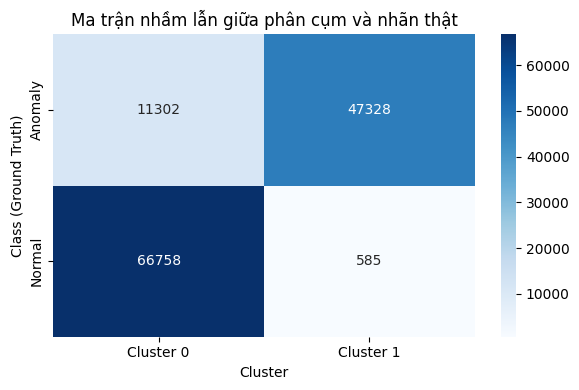

In [6]:
# So sánh cluster với nhãn thật (chỉ để tham khảo)
true_labels = LabelEncoder().fit_transform(df["class"])
conf_mat = confusion_matrix(true_labels, clusters)

plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Cluster 0", "Cluster 1"],
            yticklabels=["Anomaly", "Normal"])
plt.title("Ma trận nhầm lẫn giữa phân cụm và nhãn thật")
plt.xlabel("Cluster")
plt.ylabel("Class (Ground Truth)")
plt.tight_layout()
plt.show()
